# Изучение рынка заведений общественного питания Москвы

- Автор: Сумарокова Елизавета
- Дата: 20.03.2025

### Цели и задачи проекта

**Цель:** провести исследовательскй анализ данных,чтобы помочь заказчику определиться в типом нового бизнеса, его расположением, меню и ценовой политикой.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

# Описание данных

Данные состоят из двух датасетов:

    * `/datasets/rest_info.csv` - содержит информацию о заведениях общественного питания
    * `/datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания
    
### Описание датасета `rest_info.csv`

    `name` — название заведения;
    `address` — адрес заведения;
    `district` — административный район, в котором находится заведение;
    `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
    `hours` — информация о днях и часах работы;
    `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
    `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (0 - нет, 1 - да);
    `seats` — количество посадочных мест.
    
### Описание датасета `rest_price.csv`
    `price` - категория цен в заведении;
    `avg_bill` - средний чек в виде диапазона;
    `middle_avg_bill` - число с оценкой среднего чека, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Средний счёт»;
    `middle_coffee_cup` - число с оценкой одной чашки капучино, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Цена одной чашки капучино»

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Выводы и рекомендации


In [1]:
!pip install phik

## Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

### Загрузка данных

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Сохраняем путь к файлам с данными в строковые переменные
rest_info = 'https://code.s3.yandex.net/datasets/rest_info.csv'
rest_price = 'https://code.s3.yandex.net/datasets/rest_price.csv'

# Выгружаем данные в датафреймы
info_df = pd.read_csv(rest_info)
price_df = pd.read_csv(rest_price)

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Вывоим первые строки датафрейма info_df
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа можно сделать следующие выводы:
* названия столбцов приведены к единому стилю и отражают суть содержания;
* пропуски имеются в столбцах `hours` и  `seats`;
* тип данных для текстовых значений определён корректно. Для толбца `seats` тип данных определен как `float64` из-за наличия в столбце пропусков, однако по смыслу ему больше подошёл бы `integer` с оптимизированной размерностью. Также можно оптимизировать размерность столбца `chain`.

Познакомимся с данными датасета `rest_price.csv`

In [6]:
# Вывоим первые строки датафрейма price_df
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа можно сделать следующие выводы:
* названия столбцов приведены к единому стилю и отражают суть содержания;
* пропуски имеются во всех столбцах, кроме столбца `id`;
* для всех столбцов тип данных определён корректно.

### Подготовка единого датафрейма

Задача проекта предполагает создание портрета заведений общественного питания, поэтому можно соединить данные с общей информацией о заведениях из таблицы `info_df` с данными об их ценовой политике из таблицы `price_df`. Соединять данные будем по идентификатору заведения. При соединении оставить только полные данные -- это значит, что значение `id` должно быть в обоих датафреймах.

Соединим данные, испульзуя значение параметра `how='outer'`. Это позволит создать максимально полный датафрейм, не упустив при этом ни одного заведения

In [8]:
# Соединяем данные в единый датафрейм df
df = info_df.merge(price_df, on='id', how='outer')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях общественного питания сохранилась.

## Предобработка данных

### Проверяем наличие пропуской в данных

Узнаем абсолютное и относительное количество пропусков в датафреймах. Начнём с датафрейма `info_df`

In [10]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [11]:
# Подсчитываем долю строк с пропусками
round(df.isna().mean() * 100, 2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

В датафрейме обнаружены пропуски в следующих столбцах:
* hours (536 или 6,38%)
* seats (3611 или 42,96%)
* price (5091 или 60,56%)
* avg_bill (4590 или 54,6%)
* middle_avg_bill (5257 или 62,54%)
* middle_coffee_cup (7871 или 93,64)

Пропсуки в столбцах `hours`, `seats`, `price` и `avg_bill` могут быть вызваны следующими причинами:

* В источниках, с которых собирались данные для датасета, нет информации о часах работы заведений и количестве в них посадочных мест для гостей;
* При обработке данных произошёл технических сбой, который провёл к пропуску данных;
* Заведение закрылось и больше не работает. Это также может быть причиной отсутствия данных о часах работы и количестве мест в заведении. Однако проверить эту гипотезу мы не можем из-за отстутвия инфрмации работает на данный момент заведение или закрылось.

Пропуски в столбцах `middle_avg_bill` (909 или 22,4%) и `middle_coffee_cup` (3523 или 86,82%) могут быть обслувлены:
* пропуском данных в столбце `avg_bill`;
* отсутствием нужных подстрок в столбце `avg_bill`;
* опечатками в столбце `avg_bill`.

Как видно, пропуски в столбцах `middle_avg_bill` и `middle_coffee_cup` могут быть напрямую связаны со значениями в столбце `avg_bill`, поэтому следует внимательно изучить эти данные.

In [12]:
# Проверим пропуски в столбце 'middle_avg_bill'
missing_avg_bill = df[['id', 'avg_bill', 'middle_avg_bill']]
missing_avg_bill = missing_avg_bill[missing_avg_bill['middle_avg_bill'].isna()]
missing_avg_bill['avg_bill'].unique()

array([nan, 'Цена чашки капучино:155–185 ₽', 'Цена бокала пива:250–350 ₽',
       'Цена бокала пива:120–350 ₽', 'Цена чашки капучино:150–190 ₽',
       'Цена чашки капучино:120–170 ₽', 'Цена чашки капучино:100–200 ₽',
       'Цена бокала пива:90–230 ₽', 'Цена чашки капучино:150–210 ₽',
       'Цена чашки капучино:80–160 ₽', 'Цена чашки капучино:100 ₽',
       'Цена чашки капучино:239–274 ₽', 'Цена чашки капучино:130–190 ₽',
       'Цена бокала пива:160–499 ₽', 'Цена чашки капучино:200–300 ₽',
       'Цена чашки капучино:150–180 ₽', 'Цена чашки капучино:119–179 ₽',
       'Цена чашки капучино:100–170 ₽', 'Цена чашки капучино:200–240 ₽',
       'Цена чашки капучино:150–200 ₽', 'Цена бокала пива:199–300 ₽',
       'Цена бокала пива:от 140 ₽', 'Цена бокала пива:от 149 ₽',
       'Цена бокала пива:150–450 ₽', 'Цена чашки капучино:150–240 ₽',
       'Цена чашки капучино:от 60 ₽', 'Цена чашки капучино:120–180 ₽',
       'Цена чашки капучино:179–249 ₽', 'Цена чашки капучино:75 ₽',
       'Цена

Из описания столбца `middle_avg_bill` мы знаем, что он содержит число с оценкой среднего чека, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Средний счёт». Как видно в строках с пропущенным значением `middle_avg_bill` нет соответствующих подстрок в столбце 'avg_bill'

In [13]:
# Проверим пропуски в столбце 'middle_coffee_cup'
missing_avg_bill = df[['id', 'avg_bill', 'middle_coffee_cup']]
missing_avg_bill = missing_avg_bill[missing_avg_bill['middle_coffee_cup'].isna()]
missing_avg_bill['avg_bill'].unique()

array([nan, 'Средний счёт:1500–1600 ₽', 'Средний счёт:от 1000 ₽',
       'Средний счёт:400–600 ₽', 'Средний счёт:199 ₽',
       'Средний счёт:200–300 ₽', 'Средний счёт:от 500 ₽',
       'Средний счёт:1000–1200 ₽', 'Цена бокала пива:250–350 ₽',
       'Средний счёт:330 ₽', 'Средний счёт:1500 ₽',
       'Средний счёт:300–500 ₽', 'Средний счёт:140–350 ₽',
       'Средний счёт:350–500 ₽', 'Средний счёт:300–1500 ₽',
       'Средний счёт:от 240 ₽', 'Средний счёт:200–250 ₽',
       'Средний счёт:328 ₽', 'Средний счёт:300 ₽',
       'Средний счёт:от 345 ₽', 'Средний счёт:60–400 ₽',
       'Средний счёт:900 ₽', 'Средний счёт:500–800 ₽',
       'Средний счёт:500–1000 ₽', 'Средний счёт:600–700 ₽',
       'Цена бокала пива:120–350 ₽', 'Средний счёт:1000–1500 ₽',
       'Средний счёт:1500–2000 ₽', 'Средний счёт:2000–2500 ₽',
       'Средний счёт:600 ₽', 'Средний счёт:450 ₽',
       'Средний счёт:100–500 ₽', 'Средний счёт:от 850 ₽',
       'Средний счёт:250–600 ₽', 'Средний счёт:2100 ₽',
       'Сре

Из описания столбцa `middle_coffee_cup` мы знаем, что он содержит число с оценкой одной чашки капучино, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Цена одной чашки капучино». Как и в предыдущем пнукте, мы видим, что для строк, в которых пропущено значение столбца `middle_coffee_cup`, нет подходящих данных в стлбце 'avg_bill'.

**Промежуточный вывод**

В данных есть пропуски и их количество слишком велико для того, чтобы удалить эти строки. Часть пропусков можно было бы заменить на заглушки, однако они могут потом помешать анализу или даже исказить его результаты, поэтому оставим данные в том виде, в каком они есть сейчас.

### Оптимизируем типы данных

In [14]:
# Оптимизируем размерность столбца `chain`

df['chain'] = pd.to_numeric(info_df['chain'], 
                                 downcast='integer')

# Оптимизируем размерность всех числовых столбцов

for column in ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column],
                              downcast='float')

# Изменим тип данных столбца 'category' на категориальный
# Сначала обработаем пропуски
df['category'] = info_df['category'].fillna('нет данных')
df['category'] = info_df['category'].astype('category')

# Изменим тип данных столбца 'price' на категориальный
# Сначала обработаем пропуски
#df['price'] = df['price'].fillna('нет данных')
df['price'] = df['price'].astype('category')
# Установим желательный порядок отображения категорий
df['price'].cat.set_categories(['низкие', 'средние', 'выше среднего', 'высокие'], inplace=True)

display(df['price'].unique())

[NaN, 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (4, object): ['выше среднего', 'средние', 'высокие', 'низкие']

In [15]:
# Проверим типы данных в датафрейме с помощью атрибута dtypes
display(df.dtypes)

id                     object
name                   object
category             category
address                object
district               object
hours                  object
rating                float32
chain                    int8
seats                 float32
price                category
avg_bill               object
middle_avg_bill       float32
middle_coffee_cup     float32
dtype: object

Типы данных были успешно оптимизированы с понижением размерности числовых данных, категориальным данным присвоен соответствующий тип.

### Дубликаты в данных

Проверим данные на наличие дубликатов

In [16]:
# Проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id клиентов должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [17]:
# Проверяем неявные дубликаты в датафрейме
df.duplicated(subset='id').sum()

0

Тут тоже нет дубликатов, то есть каждая строка соответвтует уникальному заведению.

### Промежуточные выводы после предобработки данных

Представленные данные хорошего качества и не требовали много действий по предобработке:
* скорректированы типы данных с оптимизацией размерности цедлчисленных значений;
* изучены пропуски в данных. Учитывая их уоличество и результаты анализа, пропуски могут отражать особенности заведений и не являться ошибкой в данных. Почти везде их оставили без изменений (заменены на значение "нет данных" в категориальных данных)
* данные проверены на явные и неявные дубликаты -- в данных их нет;
* данные объеденены в единный датафрейм и готовы к анализу.

## Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [18]:
# Проверим распределение данных по значениях в столбце 'category'
display('Распределение данных по значениям столбца `category`')
display(round(df['category'].value_counts(normalize=True)*100, 2))

'Распределение данных по значениям столбца `category`'

кафе               28.29
ресторан           24.30
кофейня            16.81
бар,паб             9.10
пиццерия            7.53
быстрое питание     7.17
столовая            3.75
булочная            3.05
Name: category, dtype: float64

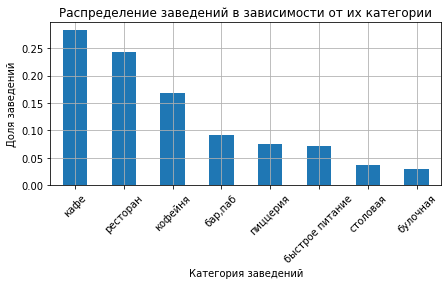

In [19]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от их категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведений')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Судя по диаграмме, почти 70% рынка общественного питания в Москве занимают кафе (28,29%), рестораны (24,3%) и кофейни (16,81%). Остальные 30% делят бары и пабы, пиццерии, заведения быстрого питания, столовые и булочные.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [20]:
# Проверим распределение данных по значениях в столбце 'district'
display('Распределение данных по значениям столбца `district`')
display(df['district'].value_counts(normalize=True))

'Распределение данных по значениям столбца `district`'

Центральный административный округ         0.266714
Северный административный округ            0.107066
Южный административный округ               0.106115
Северо-Восточный административный округ    0.105996
Западный административный округ            0.101237
Восточный административный округ           0.094932
Юго-Восточный административный округ       0.084939
Юго-Западный административный округ        0.084345
Северо-Западный административный округ     0.048656
Name: district, dtype: float64

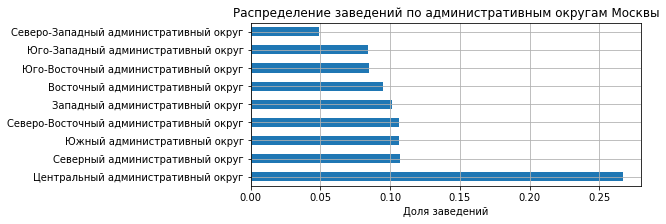

In [21]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts(normalize=True).plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по административным округам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Доля заведений')
plt.ylabel('')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Как видно, с большим отрывом по количеству заведений лидирует ЦАО, поэтому имеет смысл изучить его отдельон. Рассмотрим распределение заведений по категорям в рамках центрального округа.

In [22]:
# Проверим распределение данных по значениях в столбце 'category' в рамках ЦАО
display('Распределение данных по значениям столбца `category` в рамках ЦАО')
display(round(df['category'][df['district']=='Центральный административный округ'].value_counts(normalize=True)*100, 2)
       )

'Распределение данных по значениям столбца `category` в рамках ЦАО'

ресторан           29.88
кафе               20.70
кофейня            19.09
бар,паб            16.24
пиццерия            5.04
быстрое питание     3.88
столовая            2.94
булочная            2.23
Name: category, dtype: float64

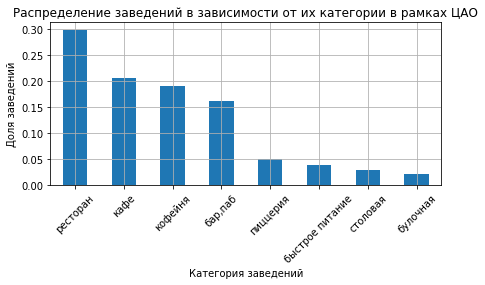

In [23]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'][df['district']=='Центральный административный округ'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от их категории в рамках ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведений')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Распределение заведений общепита по ЦАО отличается от распределения по Москве в целом. Здесь выделяется четыре лидирующие категории: рестораны (29,88%), кафе (20,7%), кофейни (19,09%) и бары/пабы (16,24). На пиццерии, заведения быстрого питания, столовые и булочные в центральном округе суммарно приходится менее 15% рынка.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [24]:
# Проверяем распределение данных по значениям столбца chain
print('Распределение данных по значениям столбца chain:')
df['chain'].value_counts(normalize=True)

Распределение данных по значениям столбца chain:


0    0.618725
1    0.381275
Name: chain, dtype: float64

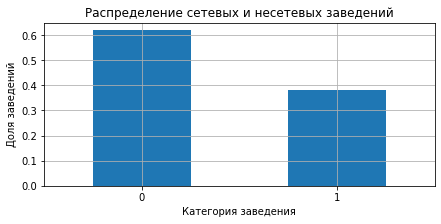

In [25]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Около 40% всех заведений в Москве является сетевыми. Изучим, какие категории заведений являются сетевыми чаще других.

In [26]:
#Создадим сводную таблицу, чтобы отобразить данные по категориям в числах
chain_pivot =df.pivot_table(
    index = ['category'],
    values = ['id', 'chain'],
    aggfunc={'chain':'sum', 'id':'count'}
)
# Переименуем столбцы сводной таблицы
chain_pivot = chain_pivot.reset_index()
chain_pivot.columns=['category', 'is_chain', 'not_chain']
chain_pivot['is_chain'] = round(chain_pivot['is_chain'] / chain_pivot['not_chain'] * 100, 2)
chain_pivot['not_chain'] = 100-chain_pivot['is_chain']
# Отсортируем таблицу по кол-ву заведений в сети
chain_pivot = chain_pivot.sort_values(by='is_chain', ascending=False)
display(chain_pivot)

,category,is_chain,not_chain
1,булочная,61.33,38.67
5,пиццерия,52.13,47.87
4,кофейня,50.96,49.04
2,быстрое питание,38.47,61.53
6,ресторан,35.73,64.27
3,кафе,32.76,67.24
7,столовая,27.94,72.06
0,"бар,паб",22.09,77.91


<Figure size 720x576 with 0 Axes>

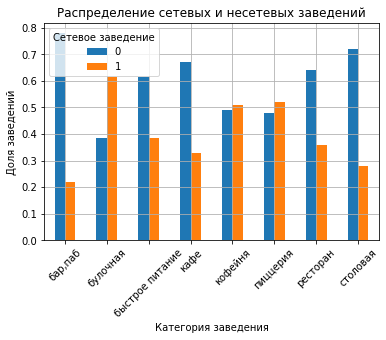

In [27]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               title=f'Распределение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля заведений')
plt.legend(title='Сетевое заведение')  # Легенда для разбивки по `category`
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Как видно из диаграммы, чаще всего сетевыми заведениями являются булочные (61,33% всех булочных являются сетевыми), реже всех в сети объединяются бары и пабы (сетевыми являются всего 22,09% заведений).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [28]:
# Рассмотрим статистические показатели столбца seats
# Поскольку при пердобработке данных мы заменили пропуски на -1, отфильтруем данные
print('Статистические показатели столбца seats:')
df['seats'][df['seats']>=0].describe()

Статистические показатели столбца seats:


count    4795.000000
mean      108.421692
std       122.833397
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Среднее и медианное значение заметно отличаются друг от друга, что говорит о несимметричном распределении данных. Значение стандартного отклонения достаточно высокое, указывает, что данные могут иметь широкий разброс, разница между минимальным и максимальным значениями это подтверждает.

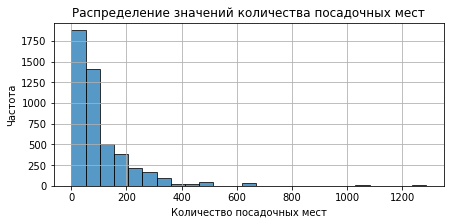

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'][df['seats']>=0].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

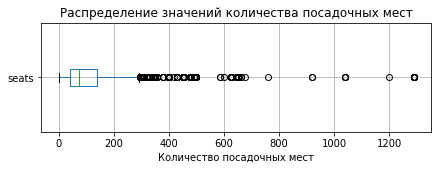

In [30]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
df[df['seats']>=0].boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

Основная масса заведений имеет менее 200 посадочных мест, а значения выше 300 можно считать выбросами. Однако эти значения не выглядят ошибкой, такой размер некоторых заведений (даже с количеством посадочных мест более 1000) общественного питания вполне допустим.

In [31]:
df.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float32

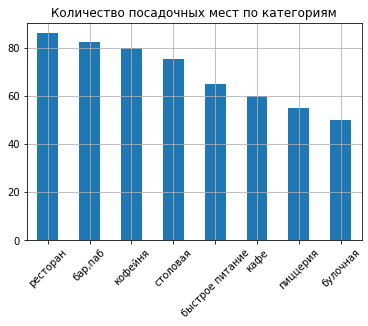

In [32]:
# Посчитаем и покажем медианное кол-во посадочных мест для каждой категории заведений
df.groupby('category')['seats'].median().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
)
# Добавляем заголовок и метки оси
plt.title('Количество посадочных мест по категориям')
plt.xlabel('')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

Наибольшее среднее количество посадочных мест имеют рестораны (86 мест), наименьшее - булочные (50 мест)

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [33]:
# Рассмотрим статистические показатели столбца rating
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Распределение рейтинга заведений близко к нормальному, о чём говорит близость среднего и медианного значений.
Все значения укладываются в пятибалльную систему: ниже 1 и выше 5 значений нет.

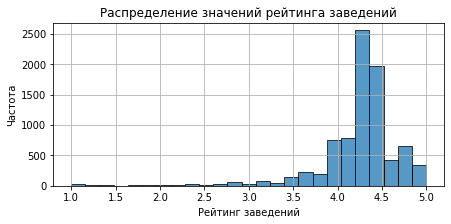

In [34]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг заведений')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

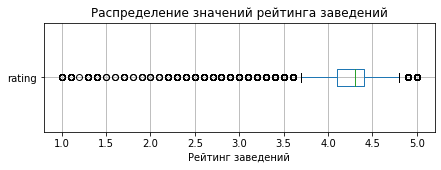

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг заведений')

# Выводим график
plt.show()

Распределение данных выглядит логнормальным, характеризуется хвостом в левой части гистограммы. Эти низкие значения можно отнести к выбросам, однако считать ошибками их нельзя, поскольку заведения с низким рейтингом действительно могут существовать.

In [36]:
# Создадим сводную таблицу, чтобы отобразить средний рейтинг по категориям в числах

rating_pivot = df.pivot_table(index = 'category',
                             values = 'rating',
                             aggfunc = 'mean')

rating_pivot = rating_pivot.reset_index()
rating_pivot.columns = ['category', 'mean_rating']
rating_pivot['mean_rating']= round(rating_pivot['mean_rating'], 2)
rating_pivot = rating_pivot.sort_values(by='mean_rating', ascending = False)

display(rating_pivot)

,category,mean_rating
0,"бар,паб",4.39
5,пиццерия,4.30
6,ресторан,4.29
4,кофейня,4.28
1,булочная,4.27
7,столовая,4.21
3,кафе,4.12
2,быстрое питание,4.05


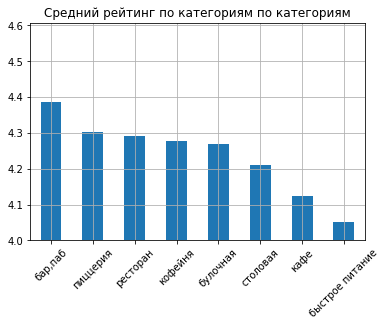

In [37]:
# Посчитаем и покажем средний рейтинг для каждой категории заведений
df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
)
# Добавляем заголовок и метки оси
plt.title('Средний рейтинг по категориям по категориям')
plt.xlabel('')
# Установим границы для оси У для большей наглядности результата
plt.ylim(4,)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Средний рейтиинг всех категорий заведений общественного питания примерно одинаков и превышает значение 4 балла.

Самый низкий средний рейтинг (4.05) наблюдается у заведений быстрого питания. Возможно, это связано с тем, что часто посетители таких заведений ожидают быстрого обслуживания, так как не имеют в распоряжении времени на полноценный приём пищи, но по разным причинам вынуждены ждать. Также заведения быстрого питания часто располагаются на фудкортах в торговых центрах: низкий рейтинг в таком случае может быть обусловлен малым количеством свободных мест в пиковое время.

Самым высоким средним рейтингом (4.39) могут похвастаться бары и пабы. Могу предположить, что это связано с тем, что в такие места люди ходят отдохнуть и пообщаться, а скорость обслуживания и ассортимент меню уходят на второй план.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [38]:
# Создадим столбец, в который запишем, является ли заведение круглосуточным

df['is_24h'] = df['hours'].str.contains('ежедневно, круглосуточно', na=False)
display(df['is_24h'].sum())

730

Столбец успешно создан, всего обнаружено 730 круглосуточных заведений.

In [39]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24h', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198949
district,0.189389
is_24h,0.160804
chain,0.119071
seats,0.000000


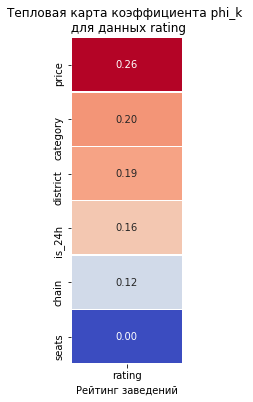

In [40]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведений')

# Выводим график
plt.show()

Сильной связи у рейтинга заведений с другими их характеристиками нет. Самый высокий коэффициент корреляции у рейтинга наблюается с ценовой категорией заведений. Изучим эту связь чуть подробнее.

In [41]:
# Отфильтруем данные для корректного анализа
df_filtered = df[df['price'] != 'нет данных']

In [42]:
df_filtered.price.unique()

[NaN, 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (4, object): ['выше среднего', 'средние', 'высокие', 'низкие']

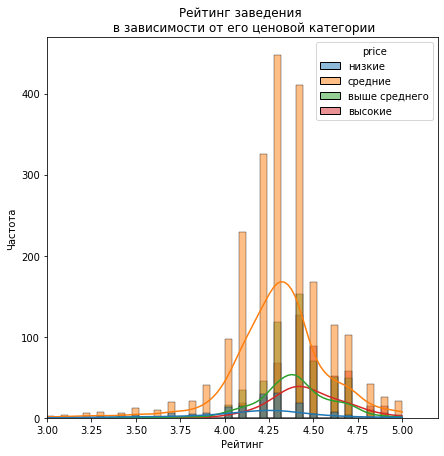

In [43]:
# Строим гистограмму
plt.figure(figsize=(7, 7))
sns.histplot(
        data = df_filtered,
        x='rating',
        kde=True,
        hue='price',
        hue_order=["низкие", "средние", "выше среднего", "высокие"]
)
plt.title(f'Рейтинг заведения \n в зависимости от его ценовой категории')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

# Установим границы для оси X для большей наглядности результата
plt.xlim(3,)
# Выводим график
plt.show()

Как видно из графика, больше всего оценок имеют заведения среднего ценового сегмента, и средний рейтинг у них около 4.3. Самую низкую среднюю оценку имеют заведния низкой ценовой категории, самую высокую -- самые дорогие. Однако прямой корреляции "чем дороже заведение, тем выше его рейтнг" не наблюдается.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [44]:
df_pivot = df.pivot_table(
    index = ['name', 'category'],
    values = 'rating',
    aggfunc=['count', 'mean']
)
# Переименуем столбцы сводной таблицы
df_pivot = df_pivot.reset_index()
df_pivot.columns=['Название', 'Категория', 'Количество заведений', 'Средний рейтинг']
# Отсортируем таблицу по кол-ву заведений в сети
df_pivot = df_pivot.sort_values(by='Количество заведений', ascending=False)
# Отобразим ТОП-15 популярных сетей в Москве
display(df_pivot.head(15))

,Название,Категория,Количество заведений,Средний рейтинг
23123,Кафе,кафе,159,3.854088
44180,Шоколадница,кофейня,119,4.178151
20677,Домино'с Пицца,пиццерия,76,4.169737
20413,Додо Пицца,пиццерия,74,4.286487
9252,One Price Coffee,кофейня,71,4.064789
44766,Яндекс Лавка,ресторан,69,3.872464
3356,Cofix,кофейня,65,4.075385
10326,Prime,ресторан,49,4.114285
22604,КОФЕПОРТ,кофейня,42,4.147619
26419,Кулинарная лавка братьев Караваевых,кафе,39,4.394872


Первое место в рейтинге популярных сетей согласно получившейся таблице занимает некая сеть "Кафе". Похоже, что здесь закралась ошибка в данных, посколько кажется сомнительным факт существования сети с таким названием. Проверим эту гипотезу.

In [45]:
# Посмотрим, сколько строк у заведений с названием "Кафе" имеют признак, что оно является сетевым
df[df['name']=='Кафе']['chain'].sum()

0

Ни одно из заведений с названием "Кафе" сетевым не является, а значит гипотеза подтвердилась и в стоблце с названиями заведений есть ошибка. Всего с названием "Кафе" обнаружено 159 строк, что соответсвует менее чем 2% данных, соответственно их можно отфильтровать для более корректного анализа.

In [46]:
df_pivot = df_pivot[df_pivot['Название'] != 'Кафе']
# Отобразим ТОП-15 популярных сетей в Москве
df_pivot = df_pivot.head(15)
display(df_pivot)

,Название,Категория,Количество заведений,Средний рейтинг
44180,Шоколадница,кофейня,119,4.178151
20677,Домино'с Пицца,пиццерия,76,4.169737
20413,Додо Пицца,пиццерия,74,4.286487
9252,One Price Coffee,кофейня,71,4.064789
44766,Яндекс Лавка,ресторан,69,3.872464
3356,Cofix,кофейня,65,4.075385
10326,Prime,ресторан,49,4.114285
22604,КОФЕПОРТ,кофейня,42,4.147619
26419,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
38310,Теремок,ресторан,36,4.105556


Text(0, 0.5, '')

<Figure size 504x360 with 0 Axes>

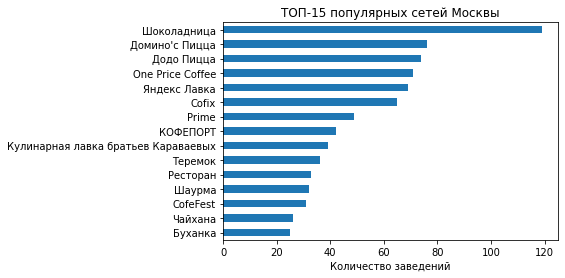

In [47]:
plt.figure(figsize=(7, 5))

# Построим линейчатую диаграмму
df_pivot.sort_values(by='Количество заведений', ascending=True).plot(kind='barh', 
                                                                               x='Название', 
                                                                               y='Количество заведений',
                                                                               legend=False)
plt.title(f'ТОП-15 популярных сетей Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('')

С большим отрывом лидирует сеть кофеен "Шоколадница", внутри которой на момент анализа существует 119 заведений. Также выделяются ещё 5 сетей, имеющих более, чем по 50 заведений: "Домино'с пицца", "Додо Пицца", "One Price Coffee", "Яндекс Лавка" и "Cofix".

<Figure size 504x360 with 0 Axes>

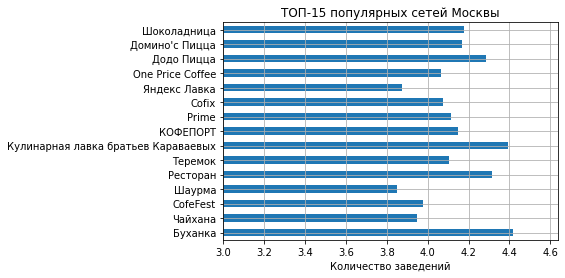

In [48]:
plt.figure(figsize=(7, 5))

# Построим линейчатую диаграмму
df_pivot.sort_values(by='Количество заведений', ascending=True).plot(kind='barh', 
                                                                               x='Название', 
                                                                               y='Средний рейтинг',
                                                                               legend=False)
plt.title(f'ТОП-15 популярных сетей Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('')
plt.xlim(3,)
plt.grid()

Средний рейтинг у топ-15 сетей Москвы довольно разнообразен: от 3.8 до 4.4 баллов. При этом у рейтинга сетей нет никакой корреляции с их популярностью.

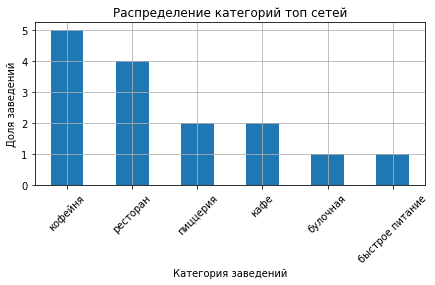

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_pivot['Категория'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение категорий топ сетей'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведений')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Самой популярной категорией в топ-15 сетей Москвы являются кофейни: в этой категории представлено 5 сетей. 4 сети являются ресторанами. На кафе и пиццерии приходится по 2 популярные сети, на заведения быстрого питания и булочные - по одной.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [50]:
# Создадим сводную таблицу, в которой сгруппируем данные по районам Москвы
# И отобразим параметры среднего чека: минимальное, среднее и максимальное значение

pivot_price = df.pivot_table(
    index = 'district',
    values = 'middle_avg_bill',
    aggfunc=['min', 'mean', 'max']
)
pivot_price.columns = ['min_bill', 'mean_bill', 'max_bill']
pivot_price = pivot_price.reset_index()
display(pivot_price)

,district,min_bill,mean_bill,max_bill
0,Восточный административный округ,50.0,820.626953,10000.0
1,Западный административный округ,50.0,1053.225464,5250.0
2,Северный административный округ,130.0,927.959656,11000.0
3,Северо-Восточный административный округ,50.0,716.611267,4500.0
4,Северо-Западный административный округ,120.0,822.222900,2900.0
5,Центральный административный округ,0.0,1191.057495,7250.0
6,Юго-Восточный административный округ,30.0,654.097961,3750.0
7,Юго-Западный административный округ,100.0,792.561707,2750.0
8,Южный административный округ,100.0,834.398071,35000.0


Обратим внимание, что в ЦАО минимальный чек составляет 0руб. Очевидно, это ошибка, поэтому для более адекватного анализа отфильтруем данные, исключив строки с нулевыми значениями в столбце 'middle_avg_bill'

In [51]:
# Создадим ту же таблицу, только отфильтровав нулевые значения

pivot_price = df[df['middle_avg_bill']>0].pivot_table(
    index = 'district',
    values = 'middle_avg_bill',
    aggfunc=['min', 'mean', 'max']
)
pivot_price.columns = ['min_bill', 'mean_bill', 'max_bill']
pivot_price = pivot_price.reset_index()
display(pivot_price.sort_values(by='mean_bill', ascending=False))

,district,min_bill,mean_bill,max_bill
5,Центральный административный округ,67.0,1192.182251,7250.0
1,Западный административный округ,50.0,1053.225464,5250.0
2,Северный административный округ,130.0,927.959656,11000.0
8,Южный административный округ,100.0,834.398071,35000.0
4,Северо-Западный административный округ,120.0,822.222900,2900.0
0,Восточный административный округ,50.0,820.626953,10000.0
7,Юго-Западный административный округ,100.0,792.561707,2750.0
3,Северо-Восточный административный округ,50.0,716.611267,4500.0
6,Юго-Восточный административный округ,30.0,654.097961,3750.0


Text(0, 0.5, '')

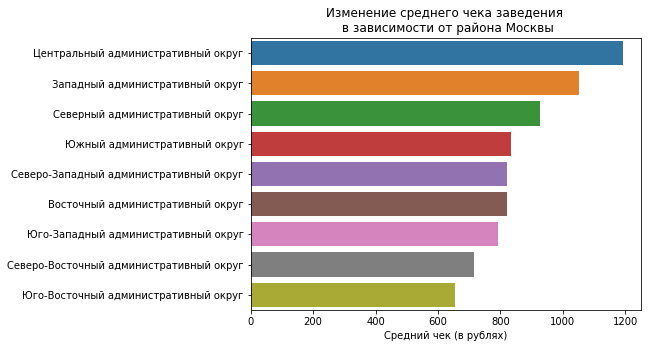

In [52]:
plt.figure(figsize=(7, 5))

# Построим линейчатую диаграмму
sns.barplot(
    data = pivot_price.sort_values(by='mean_bill', ascending=False).head(15),
    x = 'mean_bill',
    y = 'district'
)
# Настроим оси и название диаграммы
plt.title('Изменение среднего чека заведения \n в зависимости от района Москвы')
plt.xlabel('Средний чек (в рублях)')
plt.ylabel('')

Самые дорогие заведения со средним чеком порядка 1200 рублей, ожидаемо, расположены в центральном административном округе, также в тройку лидеров попали западный (1100 руб) и северный (900 руб) административные округа. Самые дешёвые заведения расположены в юго-восточном (650 руб) и северо-восточном (700 руб) округах. В остальных административных районах средний чек примерно одинаков (800 руб).

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

В результате проведенного анализа можно сделать следующие выводы:
* самыми популярными заведениями среди гостей являются заведения средней ценовой категории: именно у таких заведений максимальное количество оценок по данным Яндекс.Карт;
* рейтинг заведений очень слабо коррелирует с другими характеристиками. Наиболее выраженная связь наблюдается с ценовой категорией заведения, однако и здесь не получилось выявить прямой закономерности;
* самыми популярными сетевыми заведениями в Москве являются кофейни "Шоколадница" и пиццерии "Додо Пицца" и "Домино'с пицца";
* самый высокий средний чек наблюдается в центральном административном округе, а также в западном и северном административном округах. Значения среднего чека в этих районах превышает 900р.
* самый низкий средний чек наблюдается в юго-восточном и в северо-восточном округах. В остальных округах Москвы средний чек примерно одинаков и равен примерно 800р.


## Итоговый вывод и рекомендации

### Выводы

В результате проделанной работы было выполнено:
* загрузка и изучение данных;
* предварительная обработка данных;
* анализ полученных данных.

В анализируемых данных присутствовали ***8 категорий заведений***, а именно:
* рестораны
* кофейни
* кафе
* бары,пабы
* пиццерии
* заведения быстрого питания
* столовые
* булочные

Самой популряной категорией заведений общепита являются рестораны.

В результате анализа были рассмотрены ***все административные округа города Москвы***. Распределение заведений по категорям в рамках центрального административно округа несколько отличается от общего распределения по городу, однако каких-то значимых отличий не обнаружено.

***38%*** всех заведений Москвы являются ***сетевыми***, причём в сети чаще всего объединяются пиццерии и кофейни, а реже -- бары и пабы, рестораны и столовые.

***Рейтинг заведений*** мало зависит от их характеристик. Наиболее сильная корреляция у рейтинга наблюдается с ценовой категорией, однако задокументировать строгую связь "дороже-лучше" не удалось.

***Наиболее популярными*** среди посетителей являются заведения средней ценовой категории: именно такие заведения получили максимальное количество оценок в Яндекс Картах.

***Самые дорогие*** заведения расположены в центральном и западном административных округах Москвы: средний чек здесь превышает 1000 рублей. ***Самые дешёвые*** заведения расположено в юго-восточном и северо-восточном округах: здесь средний чек составляет около 700 рублей. В остальных районах заведения общественного питания в среднем придерживаются похожей ценовой политики и держат цены на уровне среднего чека около 800 рублей.


### Рекомендации

В результате проведенного анализа для открытия нового заведения общественного питания предлагается придерживаться следующих рекомендаций:

* для открытия нового заведения общественного питания выбрать одну из следующих категорий, как наиболее популярных в Москве:
    - кафе;
    - ресторан;
    - кофейня.
* размер заведения рекомендуется выбрать от 60 до 80 посадочных мест;
* расположить новое заведение в пределах одного из следующих округов: южный, северо-западный, восточный или юго-западный. 
* придерживаться средней ценовой политики: судя по количеству оценок пользователей в Яндекс Картах дешёвые заведения не пользуются популярностью у посетителей, а заведения среднего ценового сегмента получают максимальное количество оценок;
* рассмотреть возможность присоединения к одной из существующих сетей общественного питания: сетевые заведения занимают существенную часть рынка (около 40% всех заведений в Москве), а также уже знакомы по меню и ценам многим потенциальным посетителям. Как вариант, можно присоединиться к сети кофеен "Шоколадница", как к наиболее популярной.